# Identify Diabetic Patient using Decision Tree

Tutorial [link](https://www.youtube.com/watch?v=fQLHUrKY-d0) <br>
Kaggle [link](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

## Load libraries

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Change the column names to make it more readable

In [11]:
new_column = ['Pregnant', 'Glucose', 'BP', 'Skin', 'Insulin', 'BMI', 'Pedigree', 'Age', 'Label']

df.columns =new_column
df.head()

,Pregnant,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Preprocessing

In [13]:
df.describe()

,Pregnant,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pregnant  768 non-null    int64  
 1   Glucose   768 non-null    int64  
 2   BP        768 non-null    int64  
 3   Skin      768 non-null    int64  
 4   Insulin   768 non-null    int64  
 5   BMI       768 non-null    float64
 6   Pedigree  768 non-null    float64
 7   Age       768 non-null    int64  
 8   Label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
df.isna().sum()

Pregnant    0
Glucose     0
BP          0
Skin        0
Insulin     0
BMI         0
Pedigree    0
Age         0
Label       0
dtype: int64

From preprocessing we know that data is already good, no need for processing

## Split dataset into featiures and target variables

In [17]:
features_column = ['Pregnant', 'Glucose', 'BP', 'Insulin', 'BMI', 'Pedigree']
x = df[features_column]
y = df.Label

## Split dataset into training set and test set

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

## Create Decision Tree Classifier object

In [19]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3)

## Train Decision Tree Classifier

In [20]:
dtree = dtree.fit(x_train, y_train)

## Predict the response for test dataset

In [21]:
y_pred = dtree.predict(x_test)

## Model Accuracy

In [22]:
print('Accuracy of Decision Tree model is: ', metrics.accuracy_score(y_test, y_pred))

Accuracy of Decision Tree model is:  0.7987012987012987


In [23]:
y_pred[0:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

## Visualizing the DT

In [25]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from six import StringIO
import pydotplus

In [26]:
dot_data = StringIO()

export_graphviz(dtree,
                out_file=dot_data,
                filled = True,
                rounded = True,
                special_characters = True)

In [27]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetic_classifier.png')

True

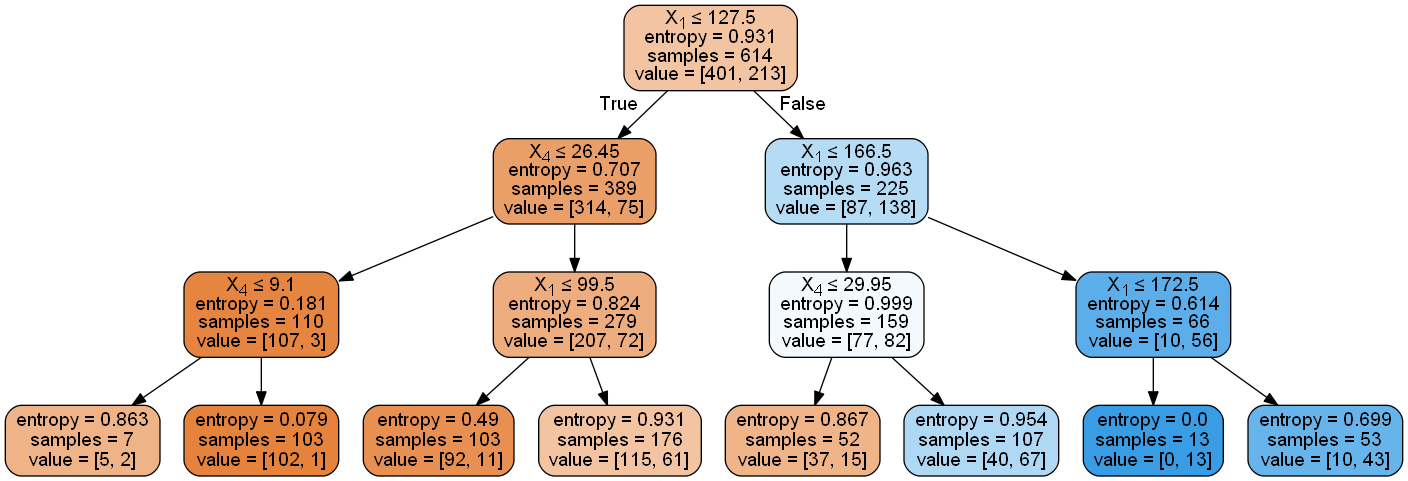

In [28]:
Image(filename='diabetic_classifier.png')